In [1]:
"""
Dataset: stores the samples and corresponding labels.
Dataloader: put a iterator around the dataset.
"""

'\nDataset: stores the samples and corresponding labels.\nDataloader: put a iterator around the dataset.\n'

In [2]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor

# pytorch offers domain specific libraries like torchvision, torchaudio, torchtext

In [12]:
# download training dataset
train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

In [14]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [31]:
train_dataloader = DataLoader(train_data, batch_size=32) 
test_dataloader = DataLoader(test_data, batch_size=32)

print(f"{len(train_dataloader.dataset)}")

for X, y in test_dataloader:
    print(X[0])
    print(y)
    print(X.shape)
    print(y.shape, y.dtype)
    break

60000
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0

In [32]:
# Understanding *args and *kwargs
# *   > args: positional arguments [packed into a tuple]
# **  > kwargs: keyword arguments [packed into a dictionary]

# when *used in front of an iterable (like list or touple) > * unpacks the items. 
# when **used in front of a dictionary > ** unpacks the key, values. 

def add_nums(*args):
    print(sum(args)) # sum fn take a iterator

add_nums( 1,2,3,4 )
add_nums( 1,2 )


def get_info(**kwargs):
    for k,v in kwargs.items():
        print(k,v)
    print("-------")

get_info(name="Nand", id=1530, age="25")
get_info(name="gpu", model=4070, release_date=2024)

10
3
name Nand
id 1530
age 25
-------
name gpu
model 4070
release_date 2024
-------


In [33]:
device = 'cuda'

# to define a nn in pytorch, we create a class that inherits from mm.Module.
# We define the layers of the network in the __init__ fn.
# We specify how the data will pass through the network in the forward fn.
  

class Model(nn.Module):

    # __init__ is a method who is the initializer of a class.
    # It is called when we create an instance of that class.
    # basically, it defines the setup of the Model class.

    # super.__init__ calls the initilizer of the parent class (nn.Module) so it can set all the necessary internals for Model.
    # without this, Model will not be able to use the built-in functionalities of nn.Module

    # def __init__(self, *args, **kwargs):
    #     super().__init__(*args, **kwargs)

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        # logits: Raw, Unnormalized scores produced by final layer of a nn.
        # logits: word came from statistics, where it is refers to log-odds function. 
        # After that we apply (i.e. softmax) and convert logits into probabilities.
        # IMPORTANT 1: many loss functions (like CrossEntropyLoss) expect logits instead of probs because computations are more numerically stable.
        # IMPORTANT 2: logits allow flexibity in deciding how to normalize the outputs. (for binay> apply Sigmoid  | for multiclass> apply softmax)

        #

        return logits

model = Model().to(device)
print(model)


Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


# in training apply softmax: For calculating loss
# in testing/inference: No need for Softmax, use Argmax. (faster)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()

    for current_batch_id, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if current_batch_id%100000 == 0 or current_batch_id == len(dataloader)-1:
            current = (current_batch_id+1)*len(X)
            print(f"Loss: {loss.item():0.4f} | {current=}/{size}")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()

    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: [Correct:{correct*100:0.3f}%] | [AvgLoss: {test_loss:>2f}]")


epochs = 50
for epoch in range(epochs):
    print("Epoch: ", epoch+1, "\t")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)


In [42]:
torch.save(model.state_dict(), 'model_500.pth')

In [43]:
model2 = Model().to(device)
model2.load_state_dict(torch.load('model_500.pth', weights_only=True))

<All keys matched successfully>

In [46]:
len(test_data[0])

2

In [51]:
model.eval()
x, y = test_data[0]

with torch.no_grad():
    x = x.to(device)
    pred = model2(x)

print(y, pred[0].argmax())

9 tensor(9, device='cuda:0')


## Tensors

In [62]:
# Tensors: similar to numpy array or matrices
# in pytorch, tensors are used to encode the input and output of a model, also params of the model.

# attributes of tensor: shape, dtype, device,....

import torch
import numpy as np

data = [
    [1,2, 101],
    [3,4, 102]
]
x = torch.tensor(data)
print(x, x.dtype, x.shape, x.device) # by default tensors are created on CPU

n = np.array(data)
print(n, n.dtype, n.shape)

y = torch.from_numpy(n)
print(y, y.dtype, y.shape)

tensor([[  1,   2, 101],
        [  3,   4, 102]]) torch.int64 torch.Size([2, 3]) cpu
[[  1   2 101]
 [  3   4 102]] int64 (2, 3)
tensor([[  1,   2, 101],
        [  3,   4, 102]]) torch.int64 torch.Size([2, 3])


In [102]:
# new tensor can retain the properties (shape, datatype) of the argument tensor, unless explicitly overriden.
# shape is an alias for .size() and was added to match numpy
z = torch.ones_like(x)
print(z, z.dtype, z.shape, z.size())

w = torch.rand_like(x, dtype=torch.float16)
print(w, w.dtype, w.shape)

tensor([[1, 1, 1],
        [1, 1, 1]]) torch.int64 torch.Size([2, 3]) torch.Size([2, 3])
tensor([[0.0020, 0.7559, 0.5122],
        [0.3179, 0.5293, 0.9502]], dtype=torch.float16) torch.float16 torch.Size([2, 3])


In [65]:
# indexing and slicing
print(x)
print(x[0]) # row
print(x[:,0]) # col

x[:, 1] = 69
print(x)

tensor([[  1,   2, 101],
        [  3,   4, 102]])
tensor([  1,   2, 101])
tensor([1, 3])
tensor([[  1,  69, 101],
        [  3,  69, 102]])


In [81]:
# joining tensors

# cat: concatenate the given sequence along an exisitng dimension.
# stack: concatenate the givem sequence along a new dimension.
print(x)
print(x.shape)

a = torch.cat([x, x], dim=0)
print(a)
b = torch.cat([x, x], dim=1)
print(b)


c = torch.stack([x, x])
print(c, c.shape)
d = torch.stack([x, x], dim=-1) # so many possible dims...
print(d, d.shape)

tensor([[  1,  69, 101],
        [  3,  69, 102]])
torch.Size([2, 3])
tensor([[  1,  69, 101],
        [  3,  69, 102],
        [  1,  69, 101],
        [  3,  69, 102]])
tensor([[  1,  69, 101,   1,  69, 101],
        [  3,  69, 102,   3,  69, 102]])
tensor([[[  1,  69, 101],
         [  3,  69, 102]],

        [[  1,  69, 101],
         [  3,  69, 102]]]) torch.Size([2, 2, 3])
tensor([[[  1,   1],
         [ 69,  69],
         [101, 101]],

        [[  3,   3],
         [ 69,  69],
         [102, 102]]]) torch.Size([2, 3, 2])


In [85]:
# matrix multiplication: @
# element wise multiplication: *
y1 = x @ x.T
y2 = x.matmul(x.T) # same thing

print(y1)
print(y2)

p = torch.tensor(
    [[1,2,3],
     [0,1,2],
     [10,11,12]]
)

z1 = p * p
z2 = p.mul(p)

print(z1)
print(z2)

tensor([[14963, 15066],
        [15066, 15174]])
tensor([[14963, 15066],
        [15066, 15174]])
tensor([[  1,   4,   9],
        [  0,   1,   4],
        [100, 121, 144]])
tensor([[  1,   4,   9],
        [  0,   1,   4],
        [100, 121, 144]])


In [86]:
# single element tensor
sum = p.sum()
print(sum, sum.dtype, sum.shape)
sum_value = sum.item()
print(sum_value, type(sum_value))

tensor(42) torch.int64 torch.Size([])
42 <class 'int'>


In [88]:
# in-place operatrions
# these are denoted by a suffix "_"
# in-place operatives save some meory, but also can be problematic when computing derivatives becuase of immediate loss of history. 

print(p)
p.add_(5)
print(p)
p.t_()
print(p)

tensor([[ 6,  5, 15],
        [ 7,  6, 16],
        [ 8,  7, 17]])
tensor([[11, 10, 20],
        [12, 11, 21],
        [13, 12, 22]])
tensor([[11, 12, 13],
        [10, 11, 12],
        [20, 21, 22]])


In [91]:
# bridge with numpy
# tensor on the CPU and numpy arrays share their underlying memory locations.
# that means, change in one with reflect the same in other.

a_tensor = torch.ones(5)
print(a_tensor, a_tensor.dtype)
b_numpy = a_tensor.numpy()
print(b_numpy, b_numpy.dtype)

a_tensor.add_(69)
print(a_tensor)
print(b_numpy)

# same thing with happen when converting a numpy to tensor.


tensor([1., 1., 1., 1., 1.]) torch.float32
[1. 1. 1. 1. 1.] float32
tensor([70., 70., 70., 70., 70.])
[70. 70. 70. 70. 70.]


## Dataset and Dataloader

In [113]:
# Dataset: stores the samples and their corresponding laebls
# Dataloader: wraps an iterable around the dataset.

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_data = datasets.FashionMNIST(
    root="data", # root: path where data is stored
    train=True, # specifies the split (train or test)
    download=True, # download if not available in root
    transform=ToTensor() # features and label transformation
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [93]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [94]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

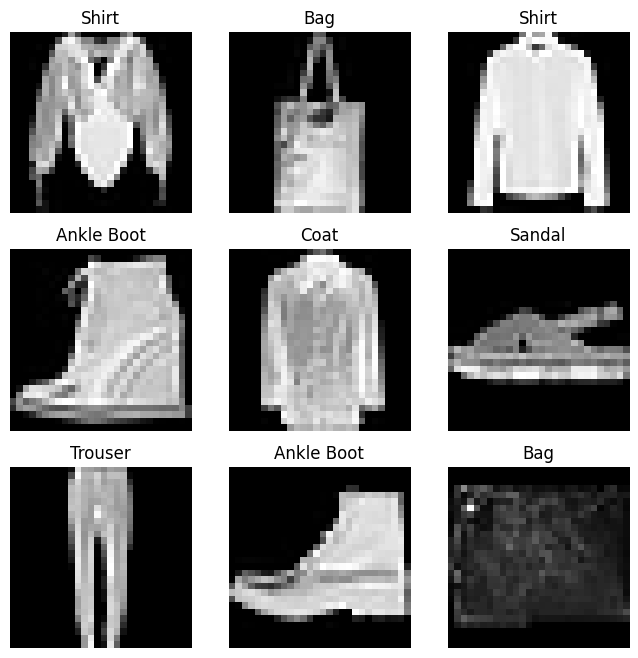

In [97]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
fig = plt.figure(figsize=(8,8))
rows, cols = 3,3
for i in range(1, rows*cols+1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [105]:
# squeeze: return a tensor with all the specified dims of input but remove the size 1.
# input shape of tensor: 1xAxBx1xCx2 > squeeze > AxBxCx2
# when dim of squeeze is given then remaining unchanged: Ax1xB > squeeze(dim=0) > Ax1xB
#                                                        Ax1xB > squeeze(dim=1) > AxB

sample_img = train_data[10][0]
print(sample_img.shape)
t = sample_img.squeeze(dim=0)
print(t.size())

torch.Size([1, 28, 28])
torch.Size([28, 28])


In [106]:
# Custom Dataset
# must implement: __init__, __len__, __getitem__

# imagese are stored in img_dir
# labels in annotations_file

import os
import pandas as pd
from torchvision.io import read_image

class CustomDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        super().__init__()
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        # Returns no of samples in dataset
        return len(self.img_labels)

    def __getitem__(self, index):
        # loads and returns a single sample from dataset at the given index
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[index, 0])
        img = read_image(img_path)
        label = self.img_labels.iloc[index, 1]
        if self.transform:
            img = self.transform(img)
        if self.target_transform:
            label = self.target_transform(label)
        return img, label

In [ ]:
from torch.utils.data import DataLoader

train_data = datasets.FashionMNIST(
    root="raw_data", # root: path where data is stored
    train=True, # specifies the split (train or test)
    download=True, # download if not available in root
    # transform=ToTensor() # features and label transformation
)
test_data = datasets.FashionMNIST(
    root="raw_data",
    train=False,
    download=True,
    # transform=ToTensor()
)


batch_size = 4

train_dataset = CustomDataset("train_labels.csv", "train_images/")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # shuffle: reshuffling at every epoch to reduce model overfitting


In [115]:
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

torch.Size([32, 1, 28, 28]) torch.Size([32])


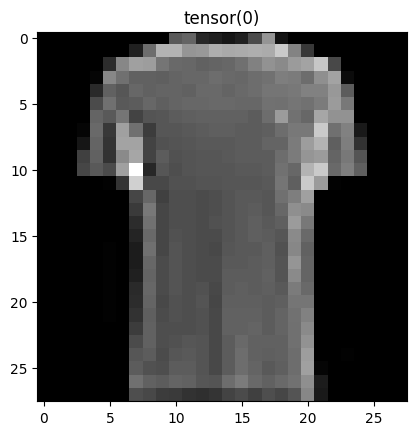

In [134]:
# iterate through the dataset.
# each iteration returns a batch of train features and labels.

sample_batch_images, sample_batch_labels = next(iter(train_dataloader))
print(sample_batch_images.shape, sample_batch_labels.shape)
sample_example_feat, label = sample_batch_images[12], sample_batch_labels[12]

plt.title(label)
plt.imshow(sample_example_feat.squeeze(), cmap="gray")
plt.show()

## Build the NN

In [136]:
# torch.nn provides namespace all the building blcks to build any nn.
# nn.Module > its a module that consists of other modules(layers). This nested structure allows for building and managing complex architectures easily.

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

if torch.cuda.is_available():
    device = 'cuda'

print(f"{torch.cuda.is_bf16_supported()=}")
    

torch.cuda.is_bf16_supported()=True


In [145]:
# we initialize the nn layers in __init__
# every nn.Module subclass implements the operation on input data in 'forward' method

# nn.Sequential: ordered container of modules. Data is passed through all the modules in the same order as defined.

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # converts 28*28 matrix image into 784 single vector
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # applies a linear trasnformation: [y=x*W_T + b]
            nn.ReLU(), # aaplies relu (rectified linear unit) element wise 
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# now create an instance of our newly created Model Class and move i to device and see its structure.
model = Model().to(device)
model

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [158]:
# to use the model, we pass the input data, this executes the model's forward
# DO NOT CALL model.forward() DIRECTLY.

x = torch.rand(3, 28, 28, device=device)
logits = model(x)
print(logits)

pred_probs = nn.Softmax(dim=1)(logits)
print(pred_probs)

y_pred = torch.argmax(pred_probs) # Returns the indices of the maximum value of ALL elements in the input tensor.
print(y_pred)

# for a batch input data
for each in pred_probs:
    print(torch.argmax(each))

tensor([[-0.0498, -0.0433, -0.0167, -0.0227, -0.0359,  0.0827,  0.0792, -0.0226,
         -0.0303,  0.0251],
        [-0.0673, -0.0375, -0.0102,  0.0468, -0.0761,  0.0800,  0.0755, -0.0056,
          0.0378,  0.0400],
        [-0.0100, -0.0157, -0.0503,  0.0017, -0.0518,  0.0727,  0.0736, -0.0417,
          0.0123,  0.0229]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.0954, 0.0960, 0.0986, 0.0980, 0.0967, 0.1089, 0.1085, 0.0980, 0.0972,
         0.1028],
        [0.0926, 0.0954, 0.0980, 0.1038, 0.0918, 0.1073, 0.1068, 0.0985, 0.1028,
         0.1031],
        [0.0988, 0.0982, 0.0949, 0.0999, 0.0947, 0.1073, 0.1074, 0.0957, 0.1010,
         0.1021]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor(5, device='cuda:0')
tensor(5, device='cuda:0')
tensor(5, device='cuda:0')
tensor(6, device='cuda:0')


In [175]:
# model parameters() and named_parameters()
# 1st will give (param)
# 2nd will give (name, param)

print(model)
print("#"*100)

# for param in model.parameters():
#     print(f"{param.shape}\n{param[:2]}\n", "-"*50)

# print("#"*100)

for name, param in model.named_parameters():
    print(f"{name}\n{param.shape}\n{param[:2]}\n", "-"*50)

# here we wil only see the weights and biases for only linear sub module
# other dont have anything > no param.

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
####################################################################################################
linear_relu_stack.0.weight
torch.Size([512, 784])
tensor([[ 0.0129, -0.0279, -0.0043,  ..., -0.0027,  0.0242, -0.0286],
        [-0.0167, -0.0013,  0.0223,  ...,  0.0124, -0.0235, -0.0090]],
       device='cuda:0', grad_fn=<SliceBackward0>)
 --------------------------------------------------
linear_relu_stack.0.bias
torch.Size([512])
tensor([-0.0268,  0.0225], device='cuda:0', grad_fn=<SliceBackward0>)
 --------------------------------------------------
linear_relu_stack.2.weight
torch.Size([512, 512])
tensor([[-0.0190, -0.0112,  0.0250,  ..., -0.0148,  0.0160, -0.0221],
        [-

### Automatic Differentiation with "torch.autograd"

In [181]:
# torch.rand:  reutrns a tensor of random numbers from uniform distribution on interval [0,1)
# torch.randn: returns a tensor of random numbers from a normal distribution [mean=0, variance=1]

print(torch.rand(2,5))
print(torch.randn(2,5))

tensor([[0.0064, 0.6173, 0.8928, 0.9064, 0.6494],
        [0.8565, 0.8730, 0.3878, 0.9410, 0.8413]])
tensor([[ 0.4959,  0.5225, -0.7898,  0.1953, -0.9847],
        [ 1.7296, -0.2732,  0.8624,  1.2395, -0.9022]])


In [188]:
# https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

# when training a NN, most freq used algo is back-propagation, 
# in which we adjust the parameters according to the gradient of the loss function with respect to the given param.
# 
# To compute these gradients, pytorch has built in differentiation engine called "torch.autograd"

x = torch.rand(5)
y = torch.zeros(3)

w = torch.randn(5,3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = x@w + b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [189]:
# Computing Gradients

# to optimize weights of parameters, we need to compute the derivative of loss fn with respecte to these parameters.
# we need del(loss)/del(w)  and   del(loss)/del(b) under some fixed values of x, y.


# to compute those derivatives we call 
loss.backward() 
#and then retrieve the values from
print(w.grad)
print(b.grad)

tensor([[0.0876, 0.1298, 0.1785],
        [0.0259, 0.0383, 0.0527],
        [0.0204, 0.0302, 0.0415],
        [0.0921, 0.1363, 0.1876],
        [0.1025, 0.1519, 0.2089]])
tensor([0.1103, 0.1634, 0.2248])


In [191]:
# Disabling Gradient Tracking

# by default, all the 'requires_grad=True' tensors trakk their computational history.
# But when we do not need to do that, (i.e. model inferencing when it is already trained), 
# we use 1) torch.no_grad()
#        2) param.detach()

z = x@w + b
print(z.requires_grad)
with torch.no_grad():
    z = x@w + b
print(z.requires_grad)

z = x@w + b
print(z.requires_grad)
z = z.detach()
print(z.requires_grad)


True
False
True
False


## Optmizing Model Parameters

In [ ]:
# Loss function
# Common Loss Functions:
# nn.MSELoss > Man Square Error > Regression Tasks
# nn.NLLLoss > NEgative Log Likelyhood > Classification Tasks
# nn.CrossEntropyLoss > Combination of [nn.LogsoftMax and nn.NLLLoss]
loss_fn = nn.CrossEntropyLoss()

# Optimizer
# Process of adjusting model params in each training step
# SGD, Adam, RMSProp,....
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)



# inside training loop, optimization happens in 3 steps:

# reset the gradient of model params.
# gradients by default add up. To prevent double counting, we expliciltely zero them at each iteration.
optimizer.zero_grad()  

# Backpropagate the prediction loss. 
# Pytorch deposits the gradients of the loss w.r.t each param.
loss.backward()

# once we have gradients, we call optimze.step() to adjust the params by the gradients collected in the backward pass.
optimizer.step()

## Save the Load the Model

In [ ]:
# pytorch models store the learned params in an internal state dictionay
# called, 'state_dict'
torch.save(model.state_dict(), "/path/to/save/model.pth")

# To load a model
# 1. Need the skeleton/architecture of the model
# 2. Need currespnding weights of this architecture.

model = Model()
model.load_state_dict(torch.load('model.pth', weights_only=True))
model.eval()

# setting weights_only=True is a good practice.
# more on: https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models
# To limit the functions executed during unpickling to only those necessary for loading weights.
# i.e. model.pth might have 1) weights 2) optimzer 3) learning_rate 4)....
# while saving if we use only state_dict() then these will not other tensors.

# setting model.eval() before inferencing: Set the Dropout and batch normalization layers to evaluation mode.
# Failing to do this will result in inconsistent inference results.


In [195]:
# Saving model skeleton/architecture as well.
# instead of passing model.state_dict, pass model
torch.save(model, 'model.pth')
m3 = torch.load('model.pth')
m3

# This approach uses Python pickle module when serializing the model, 
# thus it relies on the actual class definition to be available when loading the model.

/tmp/ipykernel_1156259/3678374834.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m3 = torch.load('model.pth')


Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)